<a href="https://colab.research.google.com/github/NandiniMalik55/data-science-projects/blob/main/quantumchem_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the QM9 dataset (replace 'path/to/qm9_dataset.csv' with the actual path)
df = pd.read_csv('/content/qm9.csv')

In [ ]:
# Display the first few rows of the dataset to inspect its structure
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  mol_id smiles          A           B           C      mu  alpha    homo  \
0  gdb_1      C  157.71180  157.709970  157.706990  0.0000  13.21 -0.3877   
1  gdb_2      N  293.60975  293.541110  191.393970  1.6256   9.46 -0.2570   
2  gdb_3      O  799.58812  437.903860  282.945450  1.8511   6.31 -0.2928   
3  gdb_4    C#C    0.00000   35.610036   35.610036  0.0000  16.28 -0.2845   
4  gdb_5    C#N    0.00000   44.593883   44.593883  2.8937  12.99 -0.3604   

     lumo     gap  ...      zpve         u0       u298       h298       g298  \
0  0.1171  0.5048  ...  0.044749 -40.478930 -40.476062 -40.475117 -40.498597   
1  0.0829  0.3399  ...  0.034358 -56.525887 -56.523026 -56.522082 -56.544961   
2  0.0687  0.3615  ...  0.021375 -76.404702 -76.401867 -76.400922 -76.422349   
3  0.0506  0.3351  ...  0.026841 -77.308427 -77.305527 -77.304583 -77.327429   
4  0.0191  0.3796  ...  0.016601 -93.411888 -93.409370 -93.408425 -93.431246   

      cv     u0_atom   u298

In [ ]:
# Display information about the dataset to understand data types and null values
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133885 entries, 0 to 133884
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mol_id     133885 non-null  object 
 1   smiles     133885 non-null  object 
 2   A          133885 non-null  float64
 3   B          133885 non-null  float64
 4   C          133885 non-null  float64
 5   mu         133885 non-null  float64
 6   alpha      133885 non-null  float64
 7   homo       133885 non-null  float64
 8   lumo       133885 non-null  float64
 9   gap        133885 non-null  float64
 10  r2         133885 non-null  float64
 11  zpve       133885 non-null  float64
 12  u0         133885 non-null  float64
 13  u298       133885 non-null  float64
 14  h298       133885 non-null  float64
 15  g298       133885 non-null  float64
 16  cv         133885 non-null  float64
 17  u0_atom    133885 non-null  float64
 18  u298_atom  133885 non-null  float64
 19  h

In [ ]:
# Select features (same as before)
features = df[['A', 'B', 'C', 'r2', 'zpve', 'u0', 'u298', 'h298',
                      'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']]  # Adjust as needed

# Select multiple target properties
target = df[['homo', 'lumo', 'gap', 'mu', 'alpha']]  # Multiple target properties

# Display the first 5 rows of features and multi-targets for confirmation
print("Selected features (first 5 rows):")
print(features.head())

print("\nTarget properties (first 5 rows):")
print(target.head())

Selected features (first 5 rows):
           A           B           C       r2      zpve         u0       u298  \
0  157.71180  157.709970  157.706990  35.3641  0.044749 -40.478930 -40.476062   
1  293.60975  293.541110  191.393970  26.1563  0.034358 -56.525887 -56.523026   
2  799.58812  437.903860  282.945450  19.0002  0.021375 -76.404702 -76.401867   
3    0.00000   35.610036   35.610036  59.5248  0.026841 -77.308427 -77.305527   
4    0.00000   44.593883   44.593883  48.7476  0.016601 -93.411888 -93.409370   

        h298       g298     cv     u0_atom   u298_atom   h298_atom   g298_atom  
0 -40.475117 -40.498597  6.469 -395.999595 -398.643290 -401.014647 -372.471772  
1 -56.522082 -56.544961  6.316 -276.861363 -278.620271 -280.399259 -259.338802  
2 -76.400922 -76.422349  6.002 -213.087624 -213.974294 -215.159658 -201.407171  
3 -77.304583 -77.327429  8.574 -385.501997 -387.237686 -389.016047 -365.800724  
4 -93.408425 -93.431246  6.278 -301.820534 -302.906752 -304.091489 -288.72

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a Tokenizer to convert SMILES strings to integer sequences
tokenizer = Tokenizer(char_level=True)  # Tokenize at the character level
tokenizer.fit_on_texts(df['smiles'])  # Fit on SMILES column to create the token mapping

# Convert SMILES to integer sequences
smiles_sequences = tokenizer.texts_to_sequences(df['smiles'])

# Pad sequences to ensure equal length (you can adjust the maxlen based on your data)
maxlen = 100  # Choose a suitable maxlen, depending on the maximum length of SMILES strings
smiles_padded = pad_sequences(smiles_sequences, maxlen=maxlen)

# Display the first 5 padded sequences to ensure the transformation
print("First 5 SMILES sequences (padded):")
print(smiles_padded[:5])

First 5 SMILES sequences (padded):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 9 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
import numpy as np

# Convert the numeric features into a numpy array
numeric_features = df[[
    'A', 'B', 'C', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv',
    'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom'
]].values

# Concatenate the padded SMILES sequences with the numeric features
final_features = np.concatenate([smiles_padded, numeric_features], axis=1)

# Display the shape of the final feature matrix
print("Shape of the final feature matrix (SMILES + Numeric):")
print(final_features.shape)

# Display the first 5 rows of the combined feature matrix
print("\nFirst 5 rows of the combined feature matrix:")
print(final_features[:5])


Shape of the final feature matrix (SMILES + Numeric):
(133885, 114)

First 5 rows of the combined feature matrix:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into training and testing
X = final_features  # This is your feature matrix (SMILES + Numeric features)
y = target  # The target variable you are predicting (e.g., molecular properties)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalize the feature matrix using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the scaling (Optional)
print(f"Mean of training data after scaling: {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of training data after scaling: {X_train_scaled.std(axis=0)}")

# You can now proceed to model training using X_train_scaled and y_train


Mean of training data after scaling: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

In [ ]:
import numpy as np

# Identify features with constant values (std = 0)
constant_features = np.where(X_train_scaled.std(axis=0) == 0)[0]
print("Constant features (with zero std deviation):", constant_features)
# Remove the constant features (those with zero standard deviation)
X_train_scaled_cleaned = np.delete(X_train_scaled, constant_features, axis=1)
X_test_scaled_cleaned = np.delete(X_test_scaled, constant_features, axis=1)

# Verify the shape of the data after removal
print("Shape of training data after removal of constant features:", X_train_scaled_cleaned.shape)
print("Shape of testing data after removal of constant features:", X_test_scaled_cleaned.shape)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

Constant features (with zero std deviation): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
Shape of training data after removal of constant features: (107108, 43)
Shape of testing data after removal of constant features: (26777, 43)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 64s 18ms/step - loss: 41.8954 - mae: 1.9043 - val_loss: 2.1184 - val_mae: 0.7017
Epoch 2/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - loss: 1.8434 - mae: 0.6548 - val_loss: 2.6173 - val_mae: 0.8287
Epoch 3/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - loss: 1.6110 - mae: 0.6045 - val_loss: 1.8713 - val_mae: 0.6550
Epoch 4/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - loss: 1.3544 - mae: 0.5613 - val_loss: 2.6839 - val_mae: 0.8943
Epoch 5/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 61s 18ms/step - loss: 1.2319 - mae: 0.5426 - val_loss: 1.0811 - val_mae: 0.4858
Epoch 6/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - loss: 1.1531 - mae: 0.5118 - val_loss: 1.2380 - val_mae: 0.5597
Epoch 7/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - loss: 1.0468 - mae: 0.4929 - val_loss: 1.4434 - val_mae: 0.5785
Epoch 8/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 88s 20ms/step - loss: 0.9889 - mae: 0.4738 - val_loss: 1.1263 - val_mae: 0.4975
Epoch 9/20
3348/3348 ━━

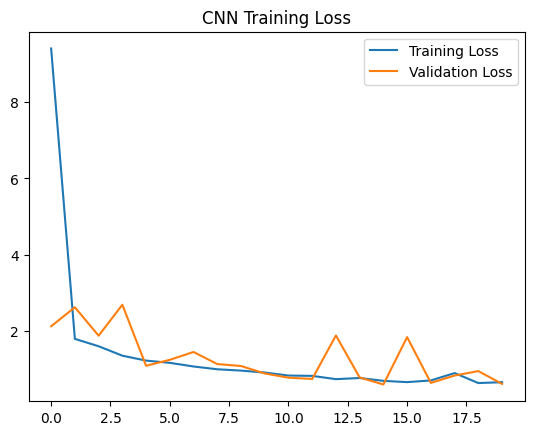

In [ ]:
# Define CNN model
cnn_model = Sequential()

# Add 1D convolutional layers (treating features as a 1D sequence)
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))  # Input shape is (num_features, 1)
cnn_model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer and pooling layer
cnn_model.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
cnn_model.add(Flatten())

# Add fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))

# Output layer (1 unit for regression task)
cnn_model.add(Dense(5))

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Reshape the data to fit the CNN input shape (num_samples, num_features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Plot training history
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training Loss')
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3348/3348 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 311.3656 - mae: 4.0172 - val_loss: 8.6422 - val_mae: 1.3858
Epoch 2/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 77s 23ms/step - loss: 9.8857 - mae: 1.2023 - val_loss: 8.3162 - val_mae: 1.2732
Epoch 3/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 6.0338 - mae: 1.0541 - val_loss: 4.5924 - val_mae: 1.0316
Epoch 4/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 2.9830 - mae: 0.7815 - val_loss: 3.4172 - val_mae: 0.8628
Epoch 5/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - loss: 2.2726 - mae: 0.6854 - val_loss: 1.8937 - val_mae: 0.6279
Epoch 6/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - loss: 1.9833 - mae: 0.6345 - val_loss: 1.7012 - val_mae: 0.5967
Epoch 7/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 1.8909 - mae: 0.6179 - val_loss: 1.7422 - val_mae: 0.6106
Epoch 8/20
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 1.8595 - mae: 0.6057 - val_loss: 1.5944 - val_mae: 0.5691
Epoch 9/20
3348/3348 ━━━━━━━━━━━━

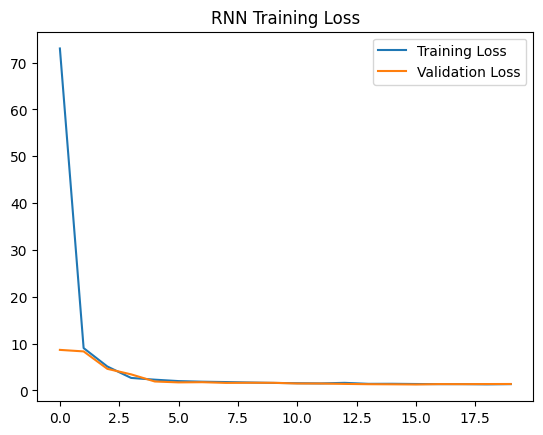

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define RNN model
rnn_model = Sequential()

# Add an RNN layer
rnn_model.add(SimpleRNN(64, input_shape=(X_train_scaled.shape[1], 1), activation='relu'))

# Add more dense layers
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(32, activation='relu'))

# Output layer (1 unit for regression task)
rnn_model.add(Dense(5))

# Compile the model
rnn_model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Reshape data to fit RNN input (num_samples, num_features, 1)
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the RNN model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

# Plot training history
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training Loss')

plt.legend()
plt.show()

In [ ]:
# Evaluate the CNN model on the test set
cnn_loss, cnn_mae = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Model - Test Loss: {cnn_loss}, Test MAE: {cnn_mae}")

837/837 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6066 - mae: 0.3571
CNN Model - Test Loss: 0.6051331758499146, Test MAE: 0.3596789538860321


In [ ]:
# Evaluate the RNN model on the test set
rnn_loss, rnn_mae = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Model - Test Loss: {rnn_loss}, Test MAE: {rnn_mae}")

837/837 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.3653 - mae: 0.5218
RNN Model - Test Loss: 1.3592559099197388, Test MAE: 0.523813784122467


In [ ]:
# CNN predictions
cnn_predictions = cnn_model.predict(X_test_cnn)

# RNN predictions
rnn_predictions = rnn_model.predict(X_test_rnn)

837/837 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
837/837 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


837/837 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

Evaluating for target property: homo
MAE for homo: 0.03249132072612714
MSE for homo: 0.001938161890551094
R² for homo: -2.9857924767062434


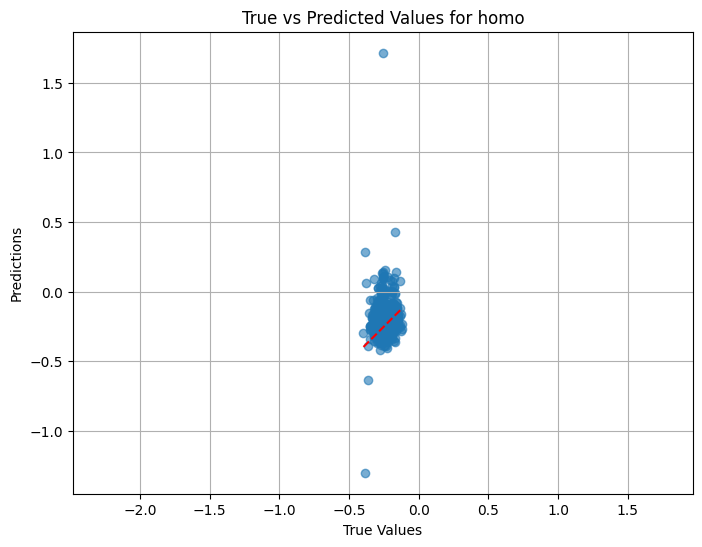


Evaluating for target property: lumo
MAE for lumo: 0.03719970323370334
MSE for lumo: 0.002912946059635124
R² for lumo: -0.31560838862718676


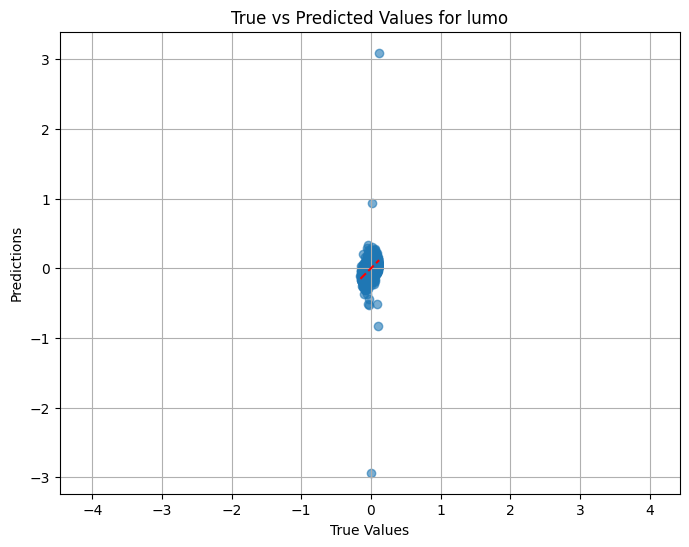


Evaluating for target property: gap
MAE for gap: 0.03889204052392019
MSE for gap: 0.002999668759037588
R² for gap: -0.3208024874910138


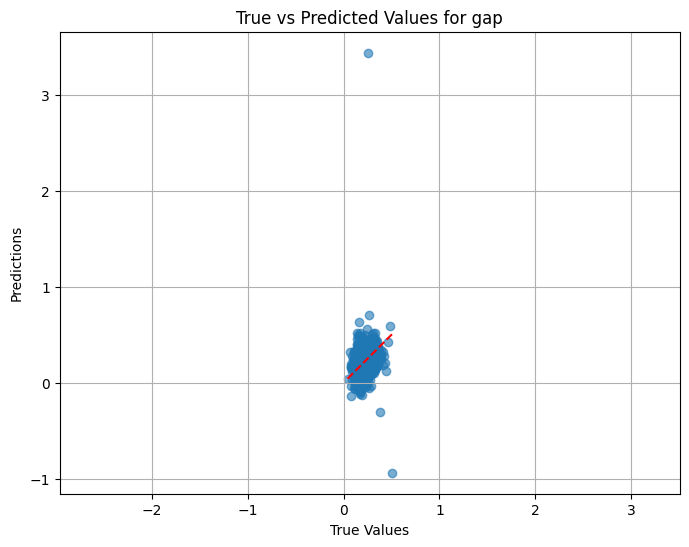


Evaluating for target property: mu
MAE for mu: 0.7642268935374864
MSE for mu: 1.1088418563899696
R² for mu: 0.5291730114087093


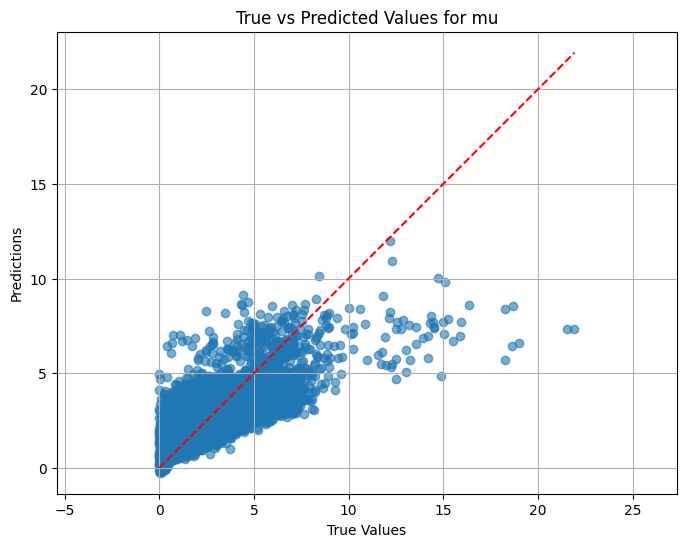


Evaluating for target property: alpha
MAE for alpha: 0.9255828684231172
MSE for alpha: 1.9089752732838683
R² for alpha: 0.9714070848481331


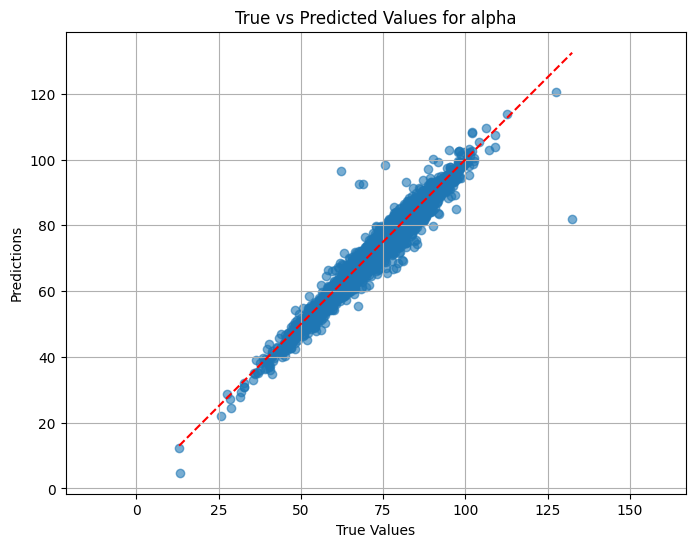

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = cnn_model.predict(X_test_cnn)

# Assuming y_test contains multiple target properties
target_properties = y_test.columns  # This should give you all the target property names

# Calculate metrics for each target property
for i, target in enumerate(target_properties):
    print(f"\nEvaluating for target property: {target}")
    target_true = y_test[target].values
    target_pred = y_pred[:, i]  # Extract the corresponding predictions for each target

    # Calculate metrics
    mae = mean_absolute_error(target_true, target_pred)
    mse = mean_squared_error(target_true, target_pred)
    r2 = r2_score(target_true, target_pred)

    # Print metrics
    print(f"MAE for {target}: {mae}")
    print(f"MSE for {target}: {mse}")
    print(f"R² for {target}: {r2}")

    # Visualize predictions vs true values
    plt.figure(figsize=(8, 6))
    plt.scatter(target_true, target_pred, alpha=0.6)
    plt.plot([target_true.min(), target_true.max()], [target_true.min(), target_true.max()], 'r--')  # Diagonal line
    plt.xlabel('True Values')

    plt.ylabel('Predictions')
    plt.title(f'True vs Predicted Values for {target}')
    plt.axis('equal')
    plt.grid()
    plt.show()

In [ ]:
# Overall accuracy percentage for each target property
threshold = 0.1  # Define a threshold for acceptable prediction
for i, target in enumerate(target_properties):
    target_true = y_test[target].values
    target_pred = y_pred[:, i]
    accurate_predictions = np.abs(target_pred - target_true) < threshold
    accuracy_percentage = np.mean(accurate_predictions) * 100

    print(f"\nOverall Accuracy Percentage for {target} (within {threshold} units): {accuracy_percentage:.2f}%")


Overall Accuracy Percentage for homo (within 0.1 units): 98.44%

Overall Accuracy Percentage for lumo (within 0.1 units): 97.25%

Overall Accuracy Percentage for gap (within 0.1 units): 95.69%

Overall Accuracy Percentage for mu (within 0.1 units): 9.96%

Overall Accuracy Percentage for alpha (within 0.1 units): 8.22%


837/837 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
y_test shape: (100, 5)
rnn_predictions shape: (26777, 5)
Number of target properties: 5
Target properties (columns in y_test): ['homo', 'lumo', 'gap', 'mu', 'alpha']

Index (i): 0, Target: homo
RNN - MAE for homo: 0.7412904248668759
RNN - MSE for homo: 0.6337723139715843
RNN - R² for homo: -6.525939591150171


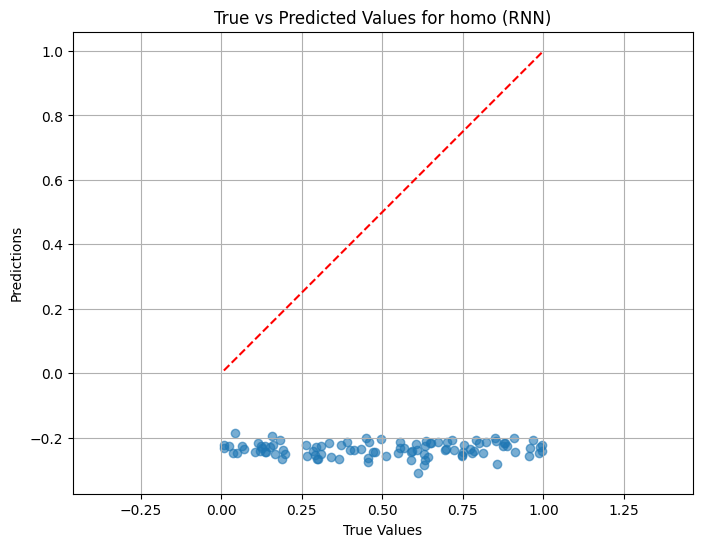


Index (i): 1, Target: lumo
RNN - MAE for lumo: 0.5172078888952241
RNN - MSE for lumo: 0.35391226299104106
RNN - R² for lumo: -3.0541939039333847


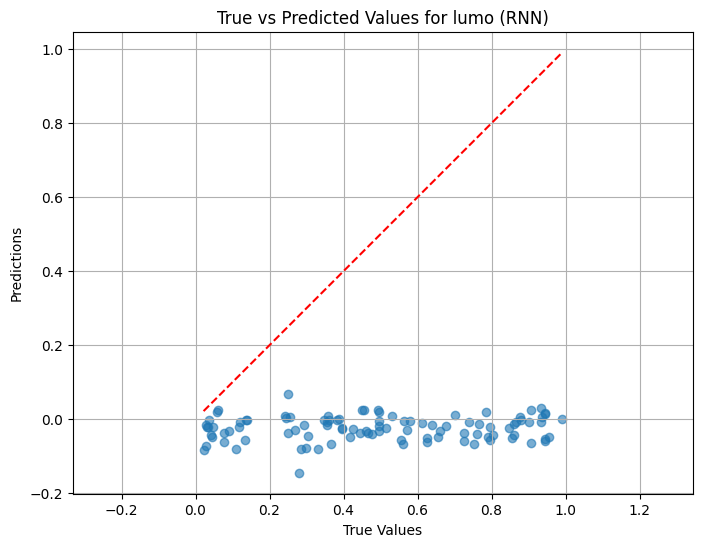


Index (i): 2, Target: gap
RNN - MAE for gap: 0.3684188484964938
RNN - MSE for gap: 0.1896348172232697
RNN - R² for gap: -1.1564626653827594


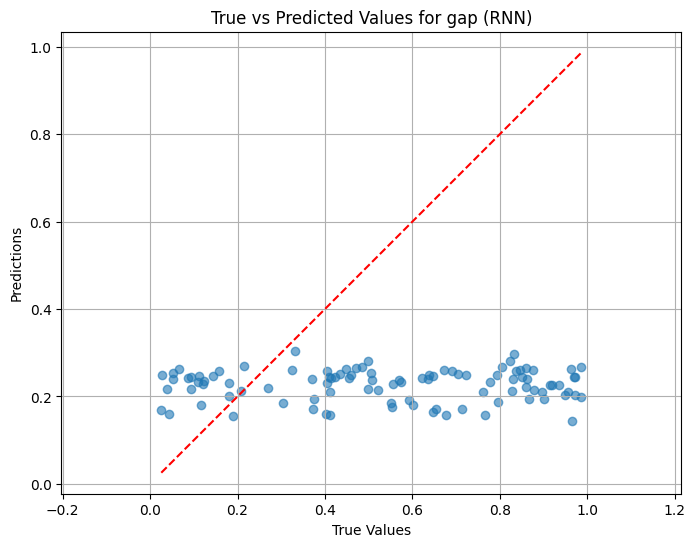


Index (i): 3, Target: mu
RNN - MAE for mu: 2.1527580787081546
RNN - MSE for mu: 5.184518764394011
RNN - R² for mu: -64.87576685713444


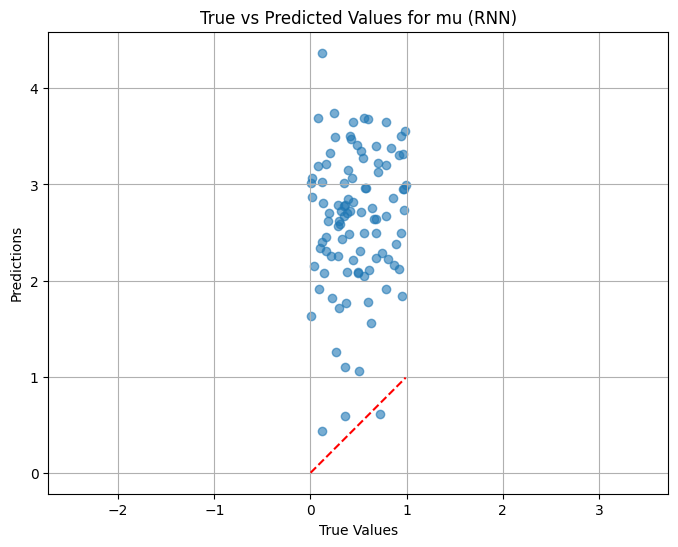


Index (i): 4, Target: alpha
RNN - MAE for alpha: 74.47473009194346
RNN - MSE for alpha: 5604.511423675211
RNN - R² for alpha: -63276.77181245222


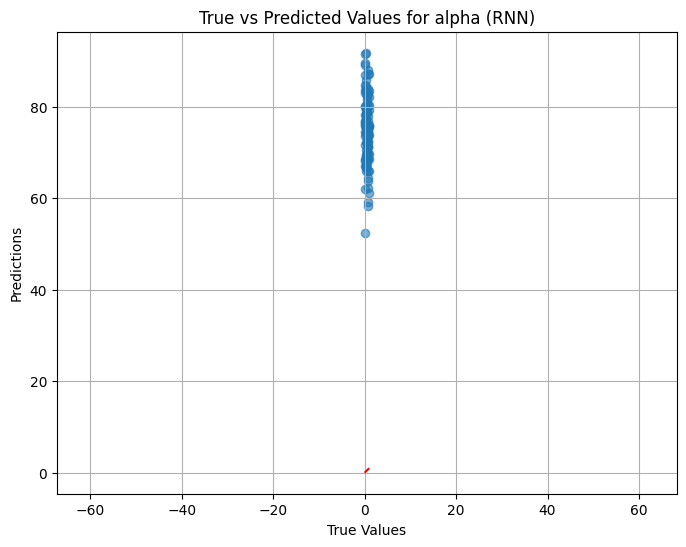


Overall Accuracy Percentage for homo (within 0.1 units) using RNN: 0.00%

Overall Accuracy Percentage for lumo (within 0.1 units) using RNN: 9.00%

Overall Accuracy Percentage for gap (within 0.1 units) using RNN: 10.00%

Overall Accuracy Percentage for mu (within 0.1 units) using RNN: 0.00%

Overall Accuracy Percentage for alpha (within 0.1 units) using RNN: 0.00%


In [ ]:
# ... (rest of the code remains the same until the evaluation section)

# RNN predictions
rnn_predictions = rnn_model.predict(X_test_rnn)

# Assuming y_test contains multiple target properties
target_properties = y_test.columns  # This should give you all the target property names

# Print Shapes and Sizes for Debugging
print("y_test shape:", y_test.shape)
print("rnn_predictions shape:", rnn_predictions.shape)
print("Number of target properties:", len(target_properties))

# Verify Column Names for Debugging
print("Target properties (columns in y_test):", list(y_test.columns))

# **Ensure rnn_predictions is sliced to match y_test's sample count**
rnn_predictions = rnn_predictions[:y_test.shape[0]]  # Slice to match y_test's sample count

# Calculate metrics for each target property using RNN
for i, target in enumerate(target_properties):
    print(f"\nIndex (i): {i}, Target: {target}")

    target_pred_rnn = rnn_predictions[:, i]
    target_true = y_test[target].values

    # Calculate metrics for RNN
    rnn_mae = mean_absolute_error(target_true, target_pred_rnn)
    rnn_mse = mean_squared_error(target_true, target_pred_rnn)
    rnn_r2 = r2_score(target_true, target_pred_rnn)

    # Print metrics for RNN
    print(f"RNN - MAE for {target}: {rnn_mae}")
    print(f"RNN - MSE for {target}: {rnn_mse}")
    print(f"RNN - R² for {target}: {rnn_r2}")

    # Visualize predictions vs true values for RNN
    plt.figure(figsize=(8, 6))
    plt.scatter(target_true, target_pred_rnn, alpha=0.6)
    plt.plot([target_true.min(), target_true.max()], [target_true.min(), target_true.max()], 'r--')  # Diagonal line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'True vs Predicted Values for {target} (RNN)')
    plt.axis('equal')
    plt.grid()
    plt.show()

# Overall accuracy percentage for each target property
threshold = 0.1  # Define a threshold for acceptable prediction
for i, target in enumerate(target_properties):
    target_true = y_test[target].values
    target_pred_rnn = rnn_predictions[:, i]
    accurate_predictions = np.abs(target_pred_rnn - target_true) < threshold
    accuracy_percentage = np.mean(accurate_predictions) * 100

    print(f"\nOverall Accuracy Percentage for {target} (within {threshold} units) using RNN: {accuracy_percentage:.2f}%")


In [ ]:
pip install torch-geometric rdkit-pypi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.6 MB/s eta 0:00:00


Epoch 1, Loss: 2.415634870529175
Epoch 2, Loss: 1.808919906616211
Epoch 3, Loss: 1.5680263042449951
Epoch 4, Loss: 1.476645827293396
Epoch 5, Loss: 1.3311831951141357
Epoch 6, Loss: 1.2406401634216309
Epoch 7, Loss: 1.1878472566604614
Epoch 8, Loss: 1.0514156818389893
Epoch 9, Loss: 0.9885733723640442
Epoch 10, Loss: 0.9333378672599792
Epoch 11, Loss: 0.8840029835700989
Epoch 12, Loss: 0.8806827664375305
Epoch 13, Loss: 0.914760947227478
Epoch 14, Loss: 0.9020745158195496
Epoch 15, Loss: 0.8046600222587585
Epoch 16, Loss: 0.8131170272827148
Epoch 17, Loss: 0.6744336485862732
Epoch 18, Loss: 0.520857572555542
Epoch 19, Loss: 0.5233139395713806
Epoch 20, Loss: 0.6057318449020386
Epoch 21, Loss: 0.46594172716140747
Epoch 22, Loss: 0.5545912981033325
Epoch 23, Loss: 0.5364900231361389
Epoch 24, Loss: 0.40417951345443726
Epoch 25, Loss: 0.35098904371261597
Epoch 26, Loss: 0.4034009873867035
Epoch 27, Loss: 0.28937840461730957
Epoch 28, Loss: 0.3720049560070038
Epoch 29, Loss: 0.333027273416

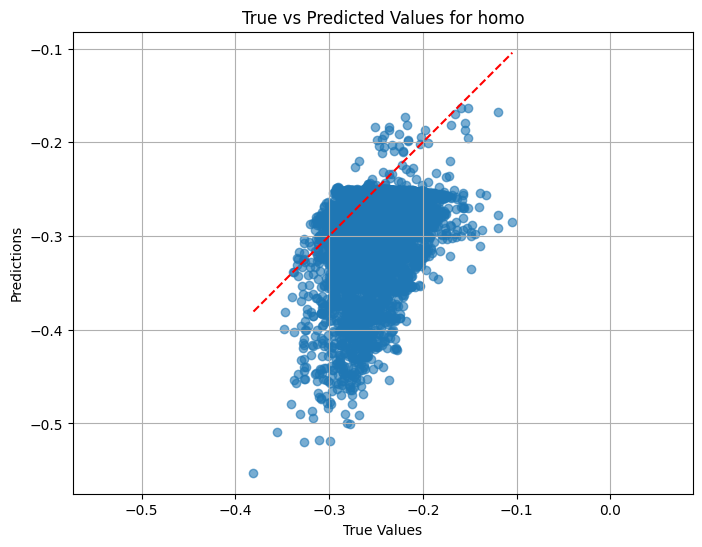

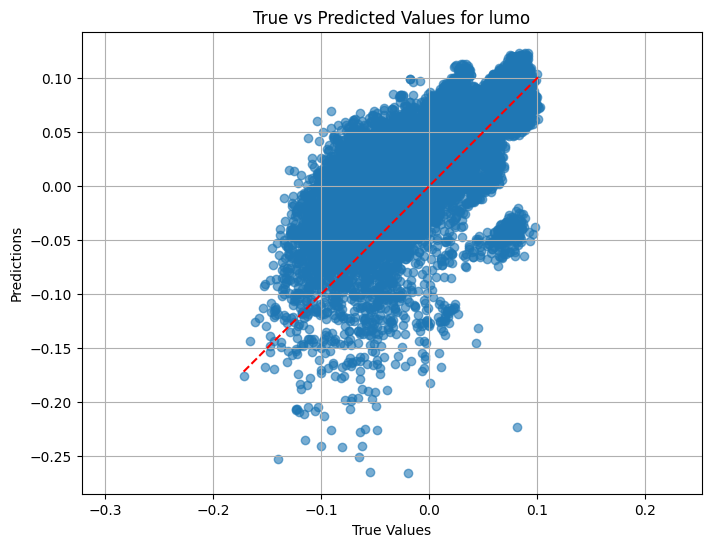

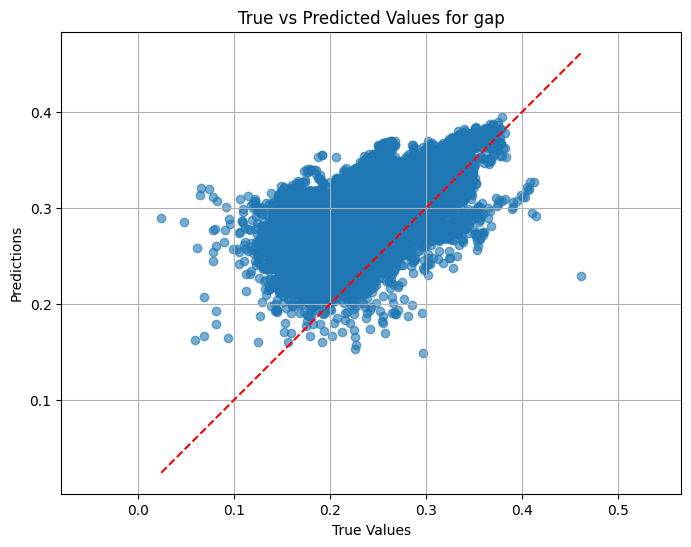

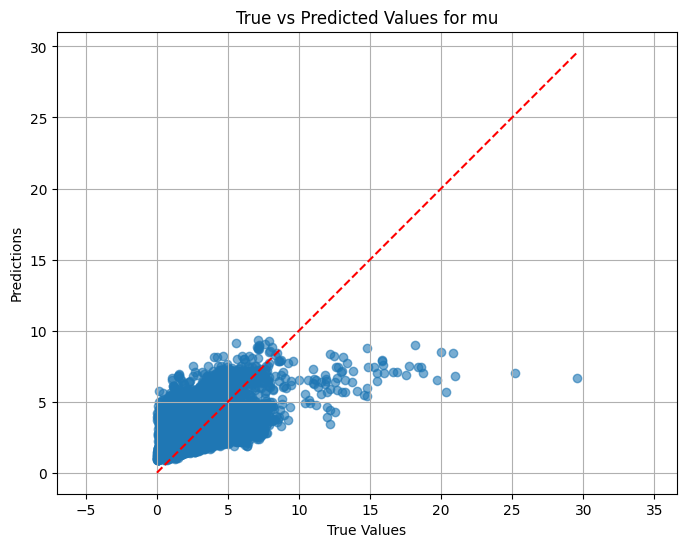

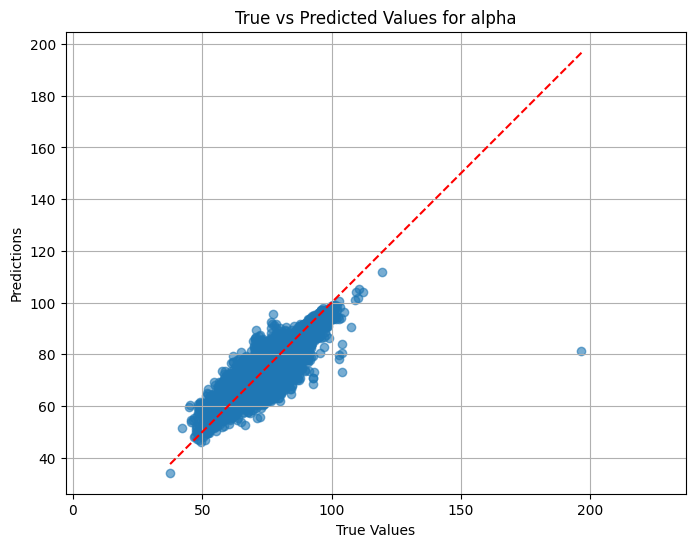

In [ ]:
import torch
from torch_geometric.data import Data, Batch
from torch_geometric.nn import GCNConv, global_mean_pool
from torch.nn import Linear, MSELoss, ReLU
from torch.optim import Adam
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Load QM9 dataset (assuming you have it in a CSV file)
import pandas as pd
df = pd.read_csv('qm9.csv')

# Define a function to convert SMILES to graph
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    AllChem.Compute2DCoords(mol)

    # Get atom and bond features
    atom_feats = []
    for atom in mol.GetAtoms():
        feats = [
            atom.GetAtomicNum(),
            atom.GetDegree(),
            atom.GetFormalCharge(),
            atom.GetTotalNumHs(),
            atom.GetNumRadicalElectrons()
        ]
        atom_feats.append(feats)

    edge_list = []
    for bond in mol.GetBonds():
        edge_list.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
        edge_list.append([bond.GetEndAtomIdx(), bond.GetBeginAtomIdx()])

    # Create PyTorch Geometric Data object
    x = torch.tensor(atom_feats, dtype=torch.float)
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    data = Data(x=x, edge_index=edge_index)

    return data

# Convert SMILES to graphs for the entire dataset
graphs = [smiles_to_graph(smiles) for smiles in df['smiles']]

# Define a simple GNN model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(5, 128)  # 5 input features, 128 output features
        self.conv2 = GCNConv(128, 128)
        self.fc1 = Linear(128, 64)
        self.fc2 = Linear(64, 5)  # 5 output properties

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = global_mean_pool(x, data.batch)

        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)

        return x

# Initialize the model, loss function, and optimizer
model = Net()
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Prepare the data for training
batch_size = 32
train_graphs = graphs[:int(0.8*len(graphs))]  # assuming 80% for training
train_properties = df[['homo', 'lumo', 'gap', 'mu', 'alpha']].values[:int(0.8*len(graphs))]
train_properties = torch.tensor(train_properties, dtype=torch.float32)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move the model to the device

for epoch in range(100):
    for i in range(0, len(train_graphs), batch_size):
        batch_graphs = train_graphs[i:i+batch_size]
        batch_properties = train_properties[i:i+batch_size]

        # Create a batched PyTorch Geometric Data object
        batch = Batch.from_data_list(batch_graphs)

        # Move the batch to the device
        batch = batch.to(device)

        # Ensure Float32 format for the batch's attributes (e.g., x, edge_index, batch)
        for attr in ['x', 'edge_index', 'batch']:
            if hasattr(batch, attr):
                tensor = getattr(batch, attr)
                if tensor.is_floating_point():
                    setattr(batch, attr, tensor.to(torch.float32))

        # Move batch_properties to the device
        batch_properties = batch_properties.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch)

        # Calculate the loss
        loss = criterion(outputs, batch_properties)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluate the model on the test set
test_graphs = graphs[int(0.8*len(graphs)):]
test_properties = df[['homo', 'lumo', 'gap', 'mu', 'alpha']].values[int(0.8*len(graphs)):]

# Convert test_properties to Float32 and move to device
test_properties = torch.tensor(test_properties, dtype=torch.float32)
test_properties = test_properties.to(device)

# Create a batched PyTorch Geometric Data object for the test set
test_batch = Batch.from_data_list(test_graphs)
test_batch = test_batch.to(device)

# Ensure Float32 format for the test batch's attributes
for attr in ['x', 'edge_index', 'batch']:
    if hasattr(test_batch, attr):
        tensor = getattr(test_batch, attr)
        if tensor.is_floating_point():
            setattr(test_batch, attr, tensor.to(torch.float32))

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    test_outputs = model(test_batch)
    test_loss = criterion(test_outputs, test_properties)
    print(f'Test Loss: {test_loss.item()}')

# Calculate metrics for each target property
target_properties = ['homo', 'lumo', 'gap', 'mu', 'alpha']
for i, target in enumerate(target_properties):
    target_true = test_properties[:, i]
    target_pred = test_outputs[:, i]
    mse = (target_true - target_pred).pow(2).mean().item()
    mae = (target_true - target_pred).abs().mean().item()
    r2 = 1 - (torch.var(target_true - target_pred) / torch.var(target_true)).item()
    print(f"\nEvaluating for target property: {target}")
    print(f"MSE for {target}: {mse}")
    print(f"MAE for {target}: {mae}")
    print(f"R² for {target}: {r2}")

# Visualize true vs predicted values for each target property
import matplotlib.pyplot as plt
for i, target in enumerate(target_properties):
    target_true = test_properties[:, i].cpu().numpy()
    target_pred = test_outputs[:, i].cpu().numpy()
    plt.figure(figsize=(8, 6))
    plt.scatter(target_true, target_pred, alpha=0.6)
    plt.plot([target_true.min(), target_true.max()], [target_true.min(), target_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'True vs Predicted Values for {target}')
    plt.axis('equal')
    plt.grid()
    plt.show()




Evaluating for target property: homo
MSE for homo: 0.0016088082920759916
MAE for homo: 0.029383841902017593
R² for homo: -0.7101149559020996
Accuracy within 0.1 units for homo: 96.95%

Evaluating for target property: lumo
MSE for lumo: 0.0017095694784075022
MAE for lumo: 0.03174823150038719
R² for lumo: 0.540867030620575
Accuracy within 0.1 units for lumo: 97.69%

Evaluating for target property: gap
MSE for gap: 0.00366435875184834
MAE for gap: 0.050127021968364716
R² for gap: 0.475139319896698
Accuracy within 0.1 units for gap: 92.32%

Evaluating for target property: mu
MSE for mu: 1.701339840888977
MAE for mu: 0.9530781507492065
R² for mu: 0.32914501428604126
Accuracy within 0.1 units for mu: 7.79%

Evaluating for target property: alpha
MSE for alpha: 12.972978591918945
MAE for alpha: 2.4832475185394287
R² for alpha: 0.8016439378261566
Accuracy within 0.1 units for alpha: 3.41%


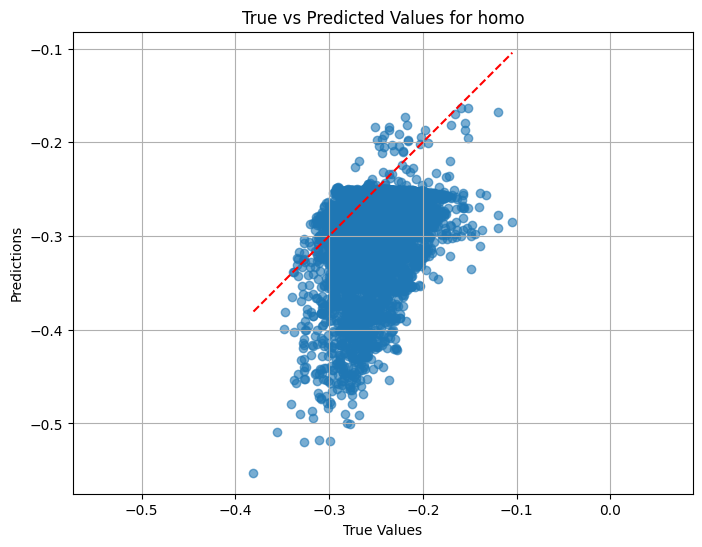

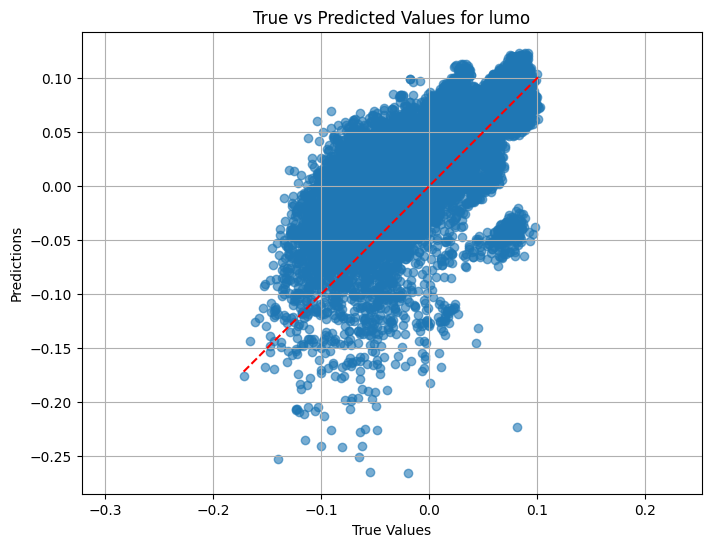

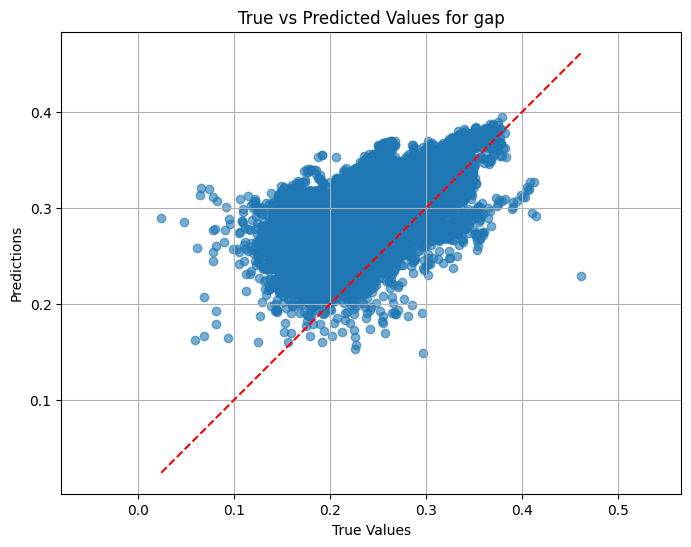

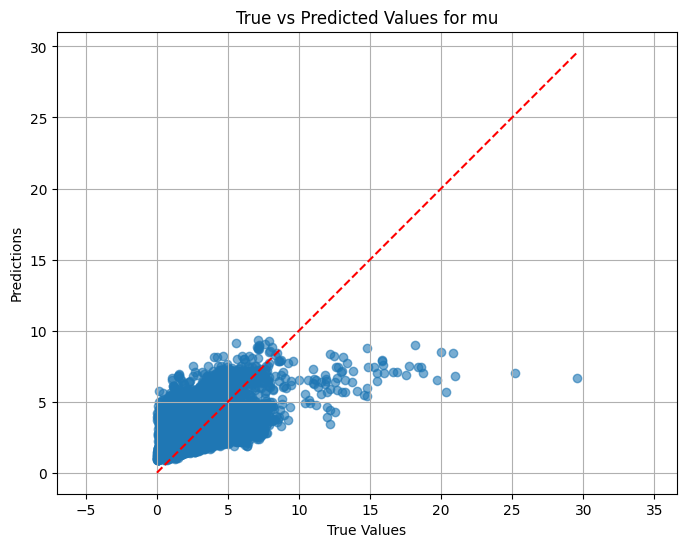

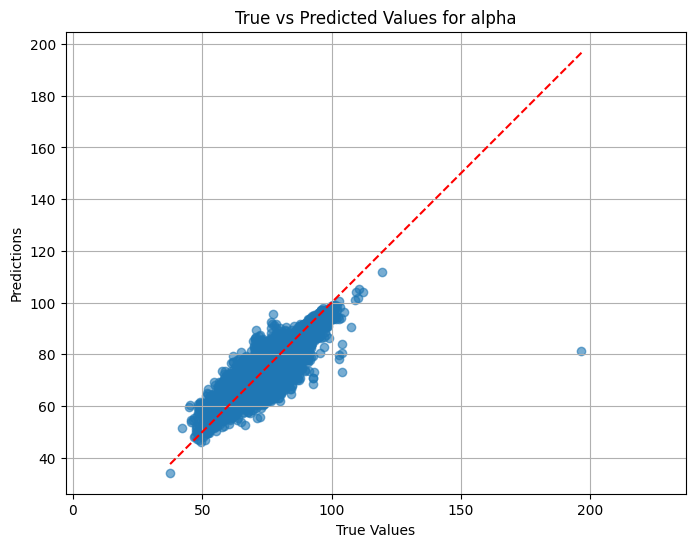

In [ ]:
# ...

# Calculate metrics for each target property
target_properties = ['homo', 'lumo', 'gap', 'mu', 'alpha']
thresholds = [0.1, 0.1, 0.1, 0.1, 0.1]  # Define thresholds for each target property
for i, target in enumerate(target_properties):
    target_true = test_properties[:, i]
    target_pred = test_outputs[:, i]
    mse = (target_true - target_pred).pow(2).mean().item()
    mae = (target_true - target_pred).abs().mean().item()
    r2 = 1 - (torch.var(target_true - target_pred) / torch.var(target_true)).item()

    # Calculate accuracy within the defined threshold
    accurate_predictions = (target_true - target_pred).abs() < thresholds[i]
    accuracy = accurate_predictions.sum().item() / len(target_true) * 100

    print(f"\nEvaluating for target property: {target}")
    print(f"MSE for {target}: {mse}")
    print(f"MAE for {target}: {mae}")
    print(f"R² for {target}: {r2}")
    print(f"Accuracy within {thresholds[i]} units for {target}: {accuracy:.2f}%")

# Visualize true vs predicted values for each target property
import matplotlib.pyplot as plt
for i, target in enumerate(target_properties):
    target_true = test_properties[:, i].cpu().numpy()
    target_pred = test_outputs[:, i].cpu().numpy()
    plt.figure(figsize=(8, 6))
    plt.scatter(target_true, target_pred, alpha=0.6)
    plt.plot([target_true.min(), target_true.max()], [target_true.min(), target_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'True vs Predicted Values for {target}')
    plt.axis('equal')
    plt.grid()
    plt.show()
